# Comparison of predicted Throughput wrt data

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- 
- creation date : October 10th 2022 
- last update : October 10th 2022

### 

- **kernel anaconda3_auxtel** at CC or **python 3** locally

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

from astropy import units as u

In [48]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

In [2]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [3]:
from functools import reduce
from scipy import interpolate

# Config

In [4]:
WLMINSEL=350
WLMAXSEL=1050

In [5]:
output_filename = "AuxTel-throughput_extended.txt"

# All component throughput

- information collected by Marc Moniez

In [6]:
filename = "AuxTel-throughput.xlsx"

In [7]:
df1 = pd.read_excel(filename,header=1,index_col=0)

In [8]:
df1.reset_index(inplace=True)

In [9]:
df1['index'] = df1.reset_index().index

In [10]:
df1.set_index('index')

,lambda,M1,M2,M3 (45°),windows per face,4 faces,total optics (except holo),holo,CCD,throughput,x10
index,,,,,,,,,,,
0,350,0.85,0.95,0.95,0.0125,0.05,0.728769,NaN,0.645,NaN,NaN
1,400,0.86,0.97,0.94,0.0125,0.05,0.744941,0.120,0.750,0.067045,0.670447
2,450,0.87,0.96,0.97,0.0125,0.05,0.769637,0.294,0.850,0.192332,1.923322
3,500,0.88,0.97,0.98,0.0125,0.05,0.794702,0.312,0.870,0.215714,2.157138
4,550,0.88,0.98,0.98,0.0125,0.05,0.802894,0.301,0.880,0.212671,2.126707
5,600,0.88,0.98,0.97,0.0125,0.05,0.794702,0.272,0.900,0.194543,1.945430
6,650,0.88,0.98,0.97,0.0125,0.05,0.794702,0.252,0.920,0.184244,1.842436
7,700,0.87,0.97,0.98,0.0125,0.05,0.785671,0.226,0.950,0.168684,1.686835
8,750,0.86,0.97,0.98,0.0125,0.05,0.776640,0.203,0.960,0.151352,1.513516


In [11]:
wl1 = df1["lambda"].values
t1_M1=df1["M1"].values
t1_M2=df1["M2"].values
t1_M3=df1["M3 (45°)"].values
t1_window=df1["4 faces"].values
t1_optic = df1["total optics (except holo)"].values
t1_holo=df1["holo"].values
t1_CCD=df1["CCD"].values
t1_throughput=df1["throughput"].values

## Information from Optical bench

In [12]:
filename = "20200211-holo-4-003-uniformity-datacube.npy"

In [13]:
thearray= np.load(filename)

In [14]:
df2 = pd.DataFrame(thearray)

In [15]:
sel_order0 = df2["order"] == 0
sel_order1 = df2["order"] == 1
sel_order2 = df2["order"] == 2

In [16]:
df_order0 = df2[sel_order0]
df_order1 = df2[sel_order1]
df_order2 = df2[sel_order2]

In [17]:
all_df_order1 = []
all_df_order2 = []
all_x0y0_order2 = []
all_x0y0_order1 = []

for xpos in df_order2.dx.unique():
    for ypos in df_order2.dy.unique():
        sel_cut = (df_order2["dx"] == xpos ) & (df_order2["dy"] == ypos)
        if len(sel_cut) >0:
            dfcut = df_order2[sel_cut]
            x0 =  dfcut.dx.unique()
            y0 =  dfcut.dy.unique()
            if len(x0) == 1 and len(y0) == 1:
                all_x0y0_order2.append((x0[0],y0[0]))
                all_df_order2.append(dfcut)
        
for xpos in df_order1.dx.unique():
    for ypos in df_order1.dy.unique():
        sel_cut = (df_order1["dx"] == xpos) & (df_order1["dy"] == ypos)
        if len(sel_cut) >0:
            dfcut = df_order1[sel_cut]
            x0 =  dfcut.dx.unique()
            y0 =  dfcut.dy.unique()
            if len(x0) == 1 and len(y0) == 1:
                all_x0y0_order1.append((x0[0],y0[0]))
                all_df_order1.append(dfcut)        

In [18]:
df2_optbench_center = all_df_order1[0]

In [19]:
df2_optbench_center.head()

,order,dx,dy,wl,DE,DE_std
1520,1,0.0,0.0,400.014,0.081134,0.000425
1521,1,0.0,0.0,419.989,0.122047,0.000553
1522,1,0.0,0.0,440.023,0.284278,0.000354
1523,1,0.0,0.0,459.966,0.307857,0.000382
1524,1,0.0,0.0,479.965,0.309489,0.000384


In [20]:
wl2 = df2_optbench_center["wl"].values
t2_holo = df2_optbench_center["DE"].values

# My extrapolation

In [21]:
wl_extrap = np.array([280.,300.,375.,400.,425.,1100])
thr_extrap = np.array([0.02777,0.07356,0.1609,0.2207,0.2759,0.0966])

# Plot Auxtel Throughput

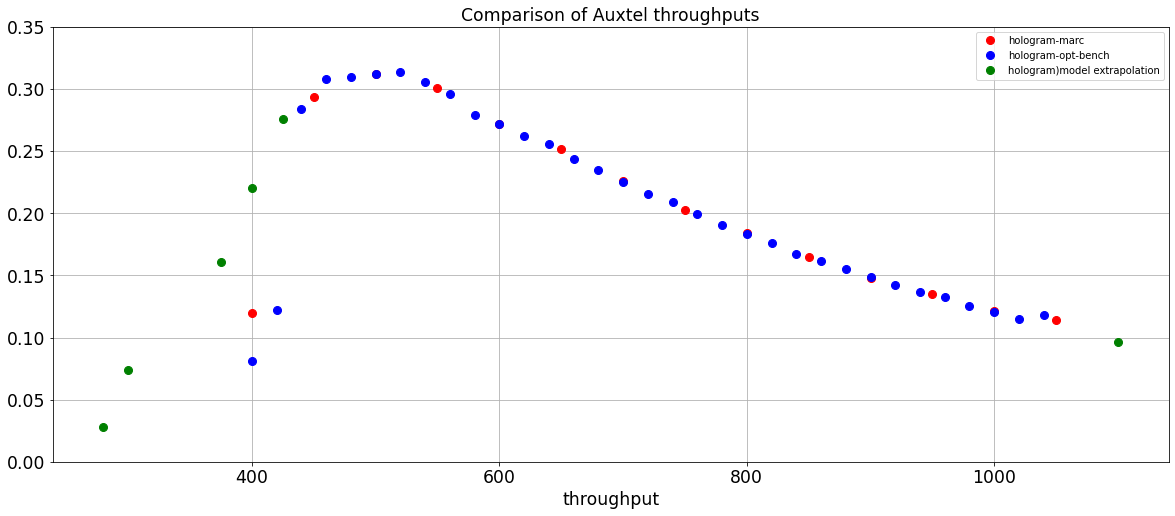

In [22]:
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(1,1,1)

ax.plot(wl1,t1_holo,"ro",label="hologram-marc",lw=3,markersize=8)
ax.plot(wl2,t2_holo,"bo",label="hologram-opt-bench",lw=3,markersize=8)
ax.plot(wl_extrap,thr_extrap,"go",label="hologram)model extrapolation",lw=3,markersize=8)
ax.legend()
ax.set_ylim(0,0.35)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_xlabel("throughput")
ax.set_title("Comparison of Auxtel throughputs")
ax.grid()
plt.show()

# Combination of points

In [23]:
bad_points1=np.where(wl1<440)[0]

In [24]:
bad_points2=np.where(wl2<440)[0]

In [25]:
# selected points (cut collections)
wl1_k = np.delete(wl1,bad_points1)
t1_holo_k=np.delete(t1_holo,bad_points1)
wl2_k = np.delete(wl2,bad_points2)
t2_holo_k=np.delete(t2_holo,bad_points2)

In [26]:
all_wl = np.concatenate((wl_extrap ,wl1_k,wl2_k), axis=None)
all_tr = np.concatenate((thr_extrap,t1_holo_k,t2_holo_k),axis=None)

In [27]:
sorted_indexes = np.argsort(all_wl)
x = all_wl[sorted_indexes]
y = all_tr[sorted_indexes]

In [28]:
WL = np.arange(280,1100)
f_holo=interpolate.interp1d(x,y,kind='slinear')

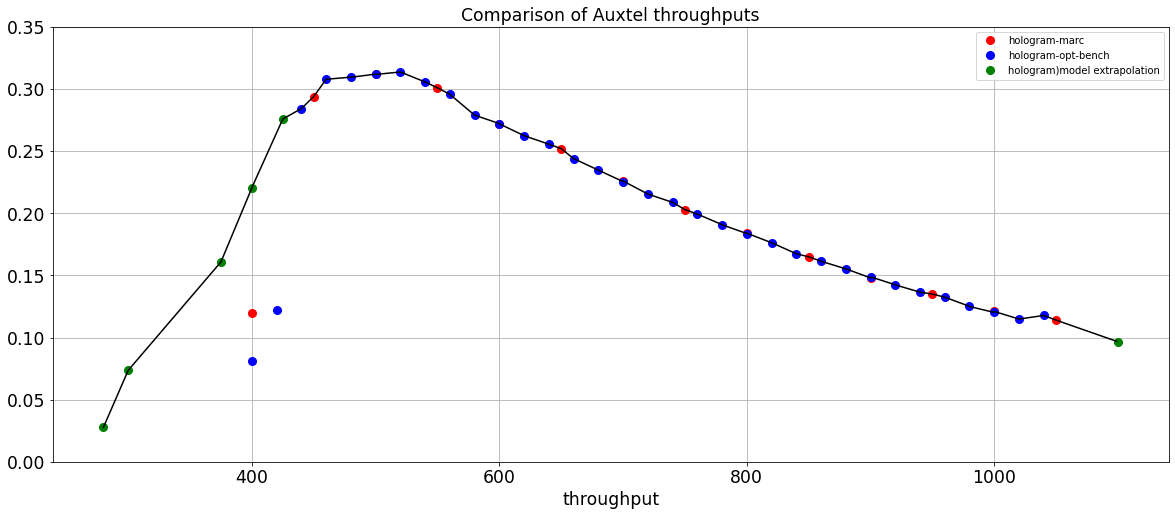

In [29]:
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(1,1,1)

ax.plot(wl1,t1_holo,"ro",label="hologram-marc",lw=3,markersize=8)
ax.plot(wl2,t2_holo,"bo",label="hologram-opt-bench",lw=3,markersize=8)
ax.plot(wl_extrap,thr_extrap,"go",label="hologram)model extrapolation",lw=3,markersize=8)
ax.plot(WL,f_holo(WL),"k-")
ax.legend()
ax.set_ylim(0,0.35)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_xlabel("throughput")
ax.set_title("Comparison of Auxtel throughputs")
ax.grid()
plt.show()

# All throughputs

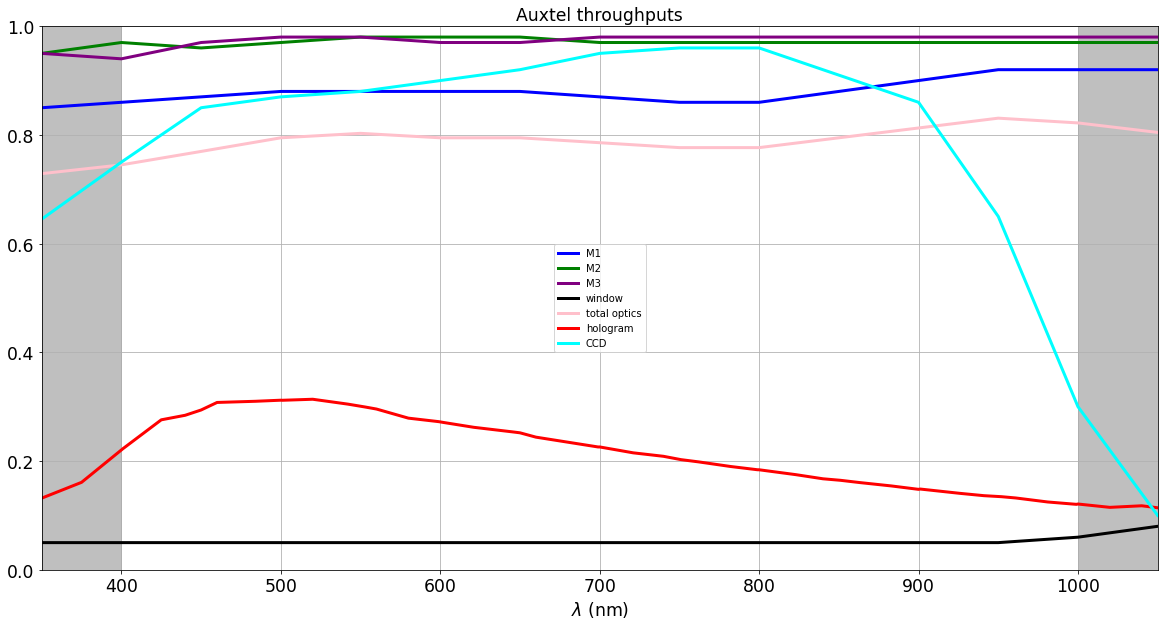

In [30]:
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,1,1)

ax.plot(wl1,t1_M1,'b-',label="M1",lw=3)
ax.plot(wl1,t1_M2,'g-',label="M2",lw=3)
ax.plot(wl1,t1_M3,'-',color="purple",label="M3",lw=3)
ax.plot(wl1,t1_window,"k-",label="window",lw=3)
ax.plot(wl1,t1_optic,"-",color="pink",label="total optics",lw=3)
ax.plot(WL,f_holo(WL),"r-",label="hologram",lw=3)
ax.plot(wl1,t1_CCD,"-",color="cyan",label="CCD",lw=3)
#ax.plot(wl1,t_throughput,"-.",color="orange",label="total",lw=5)
ymin=0
ymax=1.0
ax.set_ylim(ymin,ymax)
ax.set_xlim(WLMINSEL,WLMAXSEL)
ax.legend()
ax.set_xlabel("$\lambda$ (nm)")
ax.set_title("Auxtel throughputs")
ax.grid()
rect=mpl.patches.Rectangle((WLMINSEL,ymin),400-WLMINSEL,ymax,color ='grey',alpha=0.5)
ax.add_patch(rect)

rect=mpl.patches.Rectangle((1000,ymin),WLMAXSEL-1000,ymax,color ='grey',alpha=0.5)
ax.add_patch(rect)

plt.savefig("auxtel_throughput_linscale.png")
plt.show()



# Data

In [44]:
path_data_nofilter =  "data_auxtel/MLfit_bouguer_linearfit-20220630-empty~holo4_003-config_DECONVOLUTION_PSF2DFFM_out.csv"
path_data_redfilter = "data_auxtel/MLfit_bouguer_linearfit-20220630-FELH0600~holo4_003-config_DECONVOLUTION_PSF2DFFM_out.csv"

In [45]:
df_data_nofilter = pd.read_csv(path_data_nofilter,index_col=0)
df_data_redfilter = pd.read_csv(path_data_redfilter,index_col=0)

In [33]:
df_data_nofilter

,wavelength,throu,errthrou,sedtoa,errsedtoa
0,380.000000,0.031353,0.002272,2.143334e-13,1.829151e-14
1,382.140468,0.038436,0.003689,2.277954e-13,1.632054e-14
2,384.280936,0.044706,0.003369,1.863751e-13,1.788948e-14
3,386.421405,0.045974,0.002716,2.502621e-13,1.886051e-14
4,388.561873,0.050588,0.002637,2.626578e-13,1.551903e-14
...,...,...,...,...,...
295,1011.438127,0.021049,0.001096,9.991173e-14,6.000324e-15
296,1013.578595,0.020678,0.001242,1.003644e-13,5.816774e-15
297,1015.719064,0.020884,0.001210,8.701411e-14,4.520627e-15
298,1017.859532,0.018094,0.000940,8.736626e-14,4.597146e-15


In [46]:
WL_data_nf = df_data_nofilter["wavelength"]
thr_data_nf = df_data_nofilter["throu"]
err_thr_data_nf = df_data_nofilter["errthrou"]

WL_data_rf = df_data_redfilter["wavelength"]
thr_data_rf = df_data_redfilter["throu"]
err_thr_data_rf = df_data_redfilter["errthrou"]

## Filter throughput

In [59]:
path_redfilter = "../filters/FELH0600_Transmission.txt" 

In [62]:
red_filter = np.loadtxt(path_redfilter)
WL_rf = red_filter[:,0] 
thr_rf = red_filter[:,1] 

In [63]:
f_rf = interpolate.interp1d(WL_rf,thr_rf,kind='slinear')

# Total Throughput

In [35]:
WL2=np.linspace(350,1050.)

In [36]:
f_optic = interpolate.interp1d(wl1,t1_optic,kind='slinear')
f_ccd = interpolate.interp1d(wl1,t1_CCD,kind='slinear')

In [37]:
thr_total = f_holo(WL2)*f_optic(WL2)*f_ccd(WL2)

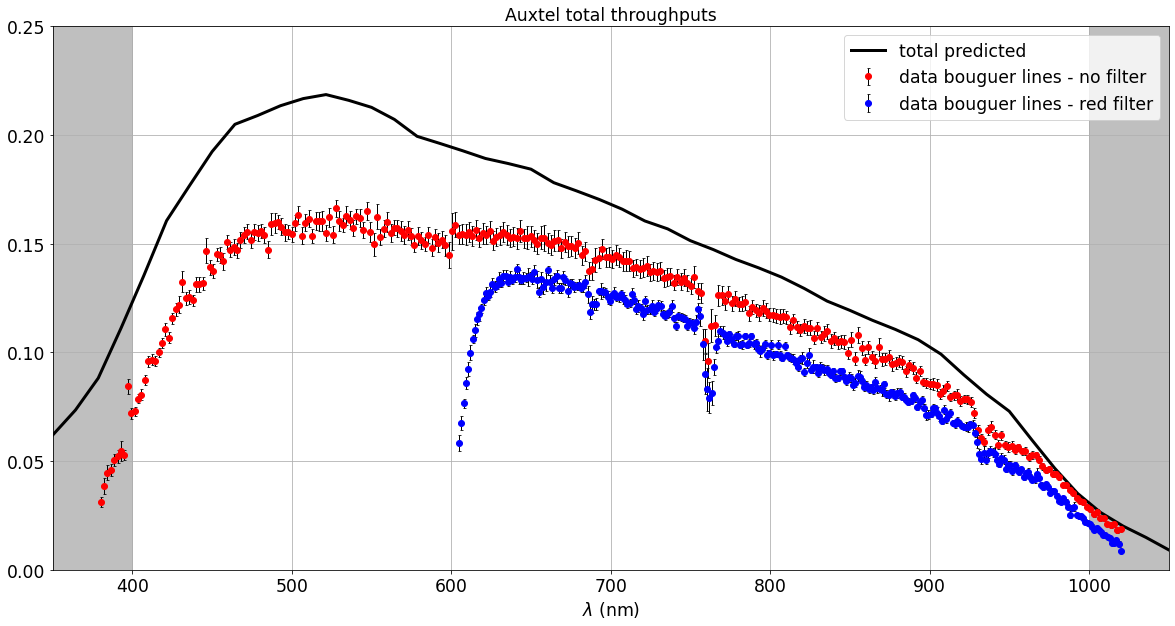

In [56]:
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,1,1)

ax.plot(WL2,thr_total,'k-',label="total predicted",lw=3)
#ax.plot(WL2,f_holo(WL2),'r-',label="hologram",lw=3)
#ax.plot(WL2,f_optic(WL2),'b-',label="optic",lw=3)
#ax.plot(WL2,f_ccd(WL2),'g-',label="CCD",lw=3)
ax.errorbar(WL_data_nf,thr_data_nf,yerr=err_thr_data_nf,fmt = 'o', color="r",capsize = 1.5, ecolor = 'k', elinewidth = 1, capthick = 0.8,label="data bouguer lines - no filter") 
ax.errorbar(WL_data_rf,thr_data_rf,yerr=err_thr_data_rf,fmt = 'o', color="b",capsize = 1.5, ecolor = 'k', elinewidth = 1, capthick = 0.8,label="data bouguer lines - red filter") 

ymin=0
ymax=0.25
ax.set_ylim(ymin,ymax)
ax.set_xlim(WLMINSEL,WLMAXSEL)
ax.legend(loc="upper right",fontsize="xx-large")
ax.set_xlabel("$\lambda$ (nm)")
ax.set_title("Auxtel throughputs")
ax.grid()
rect=mpl.patches.Rectangle((WLMINSEL,ymin),400-WLMINSEL,ymax,color ='grey',alpha=0.5)
ax.add_patch(rect)

rect=mpl.patches.Rectangle((1000,ymin),WLMAXSEL-1000,ymax,color ='grey',alpha=0.5)
ax.add_patch(rect)

ax.set_xlabel("$\lambda$ (nm)")
ax.set_title("Auxtel total throughputs")
plt.savefig("auxtel_throughput_linscale_data.png")
plt.show()

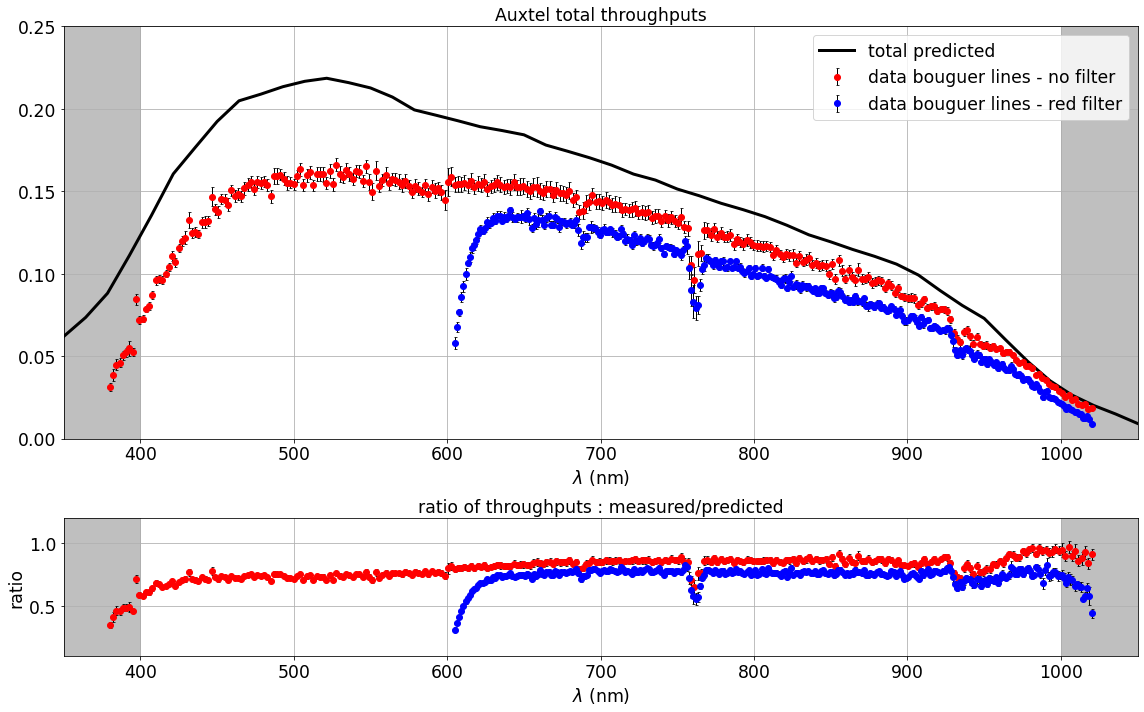

In [64]:
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

fig=plt.figure(figsize=(16,10))
gs = gridspec.GridSpec(2, 1,height_ratios=[3,1] ,figure=fig)


ax=fig.add_subplot(gs[0,0])
ax.plot(WL2,thr_total,'k-',label="total predicted",lw=3)
ax.errorbar(WL_data_nf,thr_data_nf,yerr=err_thr_data_nf,fmt = 'o', color="r",capsize = 1.5, ecolor = 'k', elinewidth = 1, capthick = 0.8,label="data bouguer lines - no filter") 
ax.errorbar(WL_data_rf,thr_data_rf,yerr=err_thr_data_rf,fmt = 'o', color="b",capsize = 1.5, ecolor = 'k', elinewidth = 1, capthick = 0.8,label="data bouguer lines - red filter") 

ymin=0
ymax=0.25
ax.set_ylim(ymin,ymax)
ax.set_xlim(WLMINSEL,WLMAXSEL)
ax.legend(loc="upper right",fontsize="xx-large")
ax.set_xlabel("$\lambda$ (nm)")
ax.set_title("Auxtel throughputs")
ax.grid()
rect=mpl.patches.Rectangle((WLMINSEL,ymin),400-WLMINSEL,ymax,color ='grey',alpha=0.5)
ax.add_patch(rect)

rect=mpl.patches.Rectangle((1000,ymin),WLMAXSEL-1000,ymax,color ='grey',alpha=0.5)
ax.add_patch(rect)

ax.set_xlabel("$\lambda$ (nm)")
ax.set_title("Auxtel total throughputs")


ax=fig.add_subplot(gs[1,0])

thr_total_denom_nf = f_holo(WL_data_nf)*f_optic(WL_data_nf)*f_ccd(WL_data_nf)
ratio_data_nf = thr_data_nf/thr_total_denom_nf
eratio_data_nf = err_thr_data_nf/thr_total_denom_nf

thr_total_denom_rf = f_holo(WL_data_rf)*f_optic(WL_data_rf)*f_ccd(WL_data_rf)*f_rf(WL_data_rf) 
ratio_data_rf = thr_data_rf/thr_total_denom_rf
eratio_data_rf = err_thr_data_rf/thr_total_denom_rf


ax.errorbar(WL_data_nf,ratio_data_nf,yerr=eratio_data_nf,fmt = 'o', color="r",capsize = 1.5, ecolor = 'k', elinewidth = 1, capthick = 0.8) 
ax.errorbar(WL_data_rf,ratio_data_rf,yerr=eratio_data_rf,fmt = 'o', color="b",capsize = 1.5, ecolor = 'k', elinewidth = 1, capthick = 0.8) 
ax.grid()

ymin=0.1
ymax=1.2
ax.set_ylim(ymin,ymax)
ax.set_xlim(WLMINSEL,WLMAXSEL)
rect=mpl.patches.Rectangle((WLMINSEL,ymin),400-WLMINSEL,ymax,color ='grey',alpha=0.5)
ax.add_patch(rect)

rect=mpl.patches.Rectangle((1000,ymin),WLMAXSEL-1000,ymax,color ='grey',alpha=0.5)
ax.add_patch(rect)

ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("ratio")
ax.set_title("ratio of throughputs : measured/predicted")

plt.tight_layout()